In [1]:
# loading necessary packages

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in pre-processed data

df = pd.read_csv("pre_processed_data.csv")
print(df.shape)

(178, 476)


In [3]:
df

,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Acetobacteraceae; __Belnapia,Bacteria; __Proteobacteria; __Betaproteobacteria; __Burkholderiales; __Comamonadaceae; __Tepidimonas,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Christensenellaceae; __Christensenellaceae_R_7_group,Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Prevotellaceae; __Prevotella,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Family_XIII; __Family_XIII_AD3011_group,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodobacterales; __Rhodobacteraceae; __Paracoccus,Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Ruminococcaceae; __Ruminiclostridium,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Run_SP154; __f; __g,Bacteria; __Proteobacteria; __Gammaproteobacteria; __Pasteurellales; __Pasteurellaceae; __Frederiksenia,Bacteria; __Actinobacteria; __Actinobacteria; __Corynebacteriales; __Corynebacteriaceae; __Corynebacterium_1,...,Bacteria; __Actinobacteria; __Actinobacteria; __Bifidobacteriales; __Bifidobacteriaceae; __Gardnerella,Bacteria; __Actinobacteria; __Actinobacteria; __Micrococcales; __Dermabacteraceae; __Brachybacterium,Bacteria; __Actinobacteria; __Actinobacteria; __Corynebacteriales; __Corynebacteriaceae; __Lawsonella,Bacteria; __Firmicutes; __Erysipelotrichia; __Erysipelotrichales; __Erysipelotrichaceae; __Erysipelotrichaceae_UCG_003,Bacteria; __Bacteroidetes; __Sphingobacteriia; __Sphingobacteriales; __Chitinophagaceae; __Lacibacter,Bacteria; __Firmicutes; __Clostridia; __Thermoanaerobacterales; __Family_III; __Thermoanaerobacterium,Bacteria; __Elusimicrobia; __Elusimicrobia; __Lineage_IIc; __f; __g,Bacteria; __Actinobacteria; __Actinobacteria; __Pseudonocardiales; __Pseudonocardiaceae; __Actinomycetospora,Bacteria; __Proteobacteria; __Alphaproteobacteria; __Rhodospirillales; __Rhodospirillales_Incertae_Sedis; __Candidatus_Alysiosphaera,Bacteria; __Bacteroidetes; __Sphingobacteriia; __Sphingobacteriales; __Saprospiraceae; __uncultured
0,0.000000,0.000000,0.000000,0.00000,0.000126,0.0,0.000253,0.0,0.0,0.00101,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.001390,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.029565,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.038261,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.000081,0.00000,0.000000,0.0,0.000565,0.0,0.0,0.00000,...,0.0,0.0,0.000323,0.023310,0.0,0.0,0.0,0.000323,0.0,0.0
174,0.000000,0.000000,0.000000,0.00036,0.000000,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.022334,0.0,0.0,0.0,0.000000,0.0,0.0
175,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.001314,0.0,0.0,0.0,0.000000,0.0,0.0
176,0.000000,0.001351,0.000000,0.00000,0.000000,0.0,0.000270,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.017295,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# t-SNE = t-distributed Stochastic Neighbor Embedding

# have determined from Neha's analysis that we need to use 3 clusters

# can apply PCA first as a dimensionality reduction technique, create a new dataset based on that, and then use t-SNE

In [4]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(df)
labels = kmeans.labels_

/home/cpryor7/miniconda3/envs/cenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


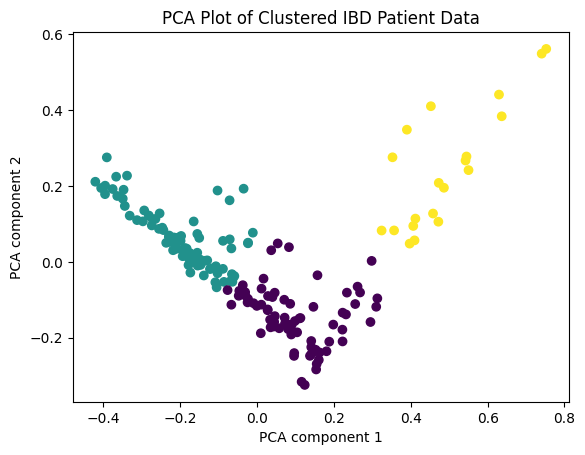

In [5]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df)

# plot the data points with different colors for each cluster
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=labels)
plt.title("PCA Plot of Clustered IBD Patient Data")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

In [6]:
pca.explained_variance_ratio_

array([0.39368743, 0.16373841])

In [26]:
tsne = TSNE(n_components=2, perplexity=80)
tsne_results = tsne.fit_transform(df)

In [ ]:
# testing different parameters, but keep getting completely different KL divergence for the same parameters run several times
# can run this test to get the right perplexity - find the perplexity where the divergence has become constant

<AxesSubplot: >

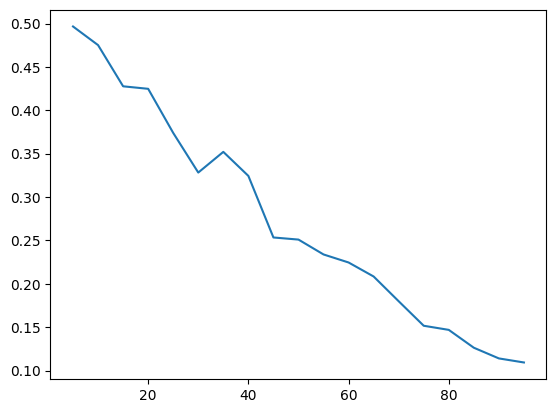

In [27]:
import numpy as np

perplexity = np.arange(5, 100, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(df)
    divergence.append(model.kl_divergence_)
fig = sns.lineplot(x=perplexity, y=divergence, markers=True)
fig

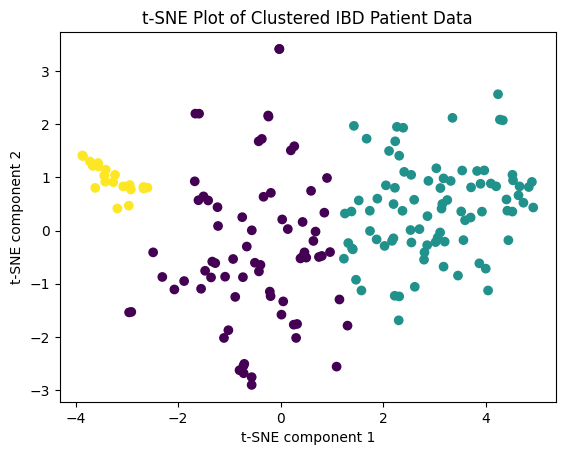

In [29]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels)
plt.title("t-SNE Plot of Clustered IBD Patient Data")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

In [30]:
tsne.n_features_in_

476

In [ ]:
# deciding to use PCA first and then t-SNE on that data

In [7]:
pca = PCA(n_components=100)
pca_results = pca.fit_transform(df)
tsne = TSNE(n_components=2, init="pca", perplexity=120)
tsne_pca_results = tsne.fit_transform(pca_results)

<AxesSubplot: >

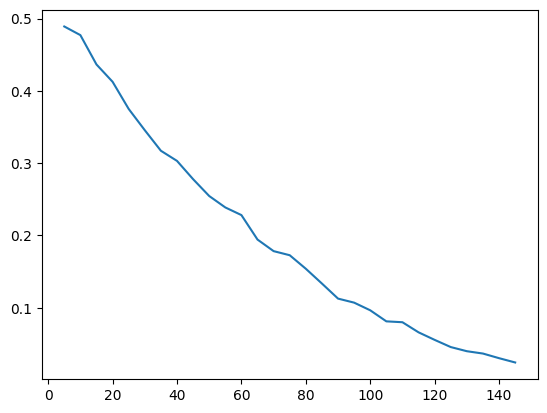

In [35]:
import numpy as np

perplexity = np.arange(5, 150, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(pca_results)
    divergence.append(model.kl_divergence_)
fig = sns.lineplot(x=perplexity, y=divergence, markers=True)
fig

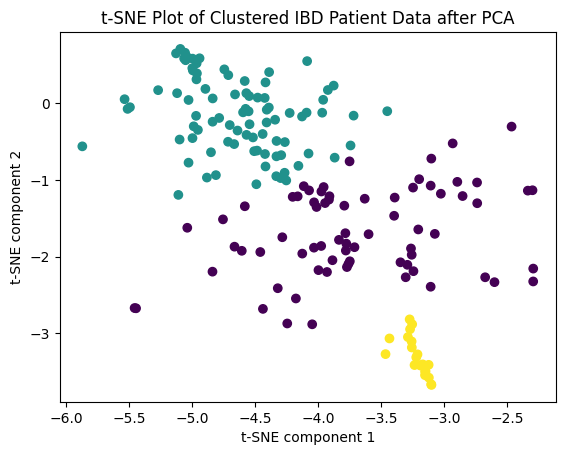

In [13]:
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=labels)
plt.title("t-SNE Plot of Clustered IBD Patient Data after PCA")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

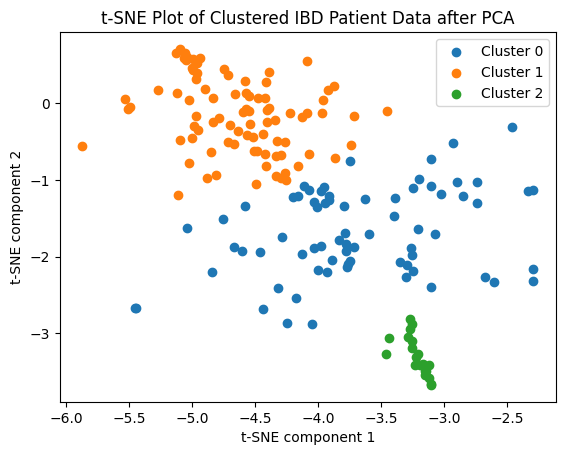

In [15]:
cluster_labels = labels

unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    plt.scatter(tsne_pca_results[cluster_labels == label, 0], 
                tsne_pca_results[cluster_labels == label, 1], 
                label='Cluster {}'.format(label))

plt.legend()
plt.title("t-SNE Plot of Clustered IBD Patient Data after PCA")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

In [17]:
# need to figure out how to get much information from this
# what are the important features here?

print(tsne.n_features_in_)

feature_names = df.columns
print(len(feature_names))

# can't get attribute of feature names used in the fit
# tsne.n_features_names_in_ gives an error

100
476


In [1]:
corr_matrix = np.corrcoef(df.T, tsne_pca_results.T)
print(len(corr_matrix))
importance_scores = np.abs(corr_matrix[:-2, -2:])
print(len(importance_scores))

feature_importance = pd.DataFrame(importance_scores.T, columns=feature_names)
feature_ranking = feature_importance.mean().sort_values(ascending=False)
print(feature_ranking[0:5])

NameError: name 'np' is not defined

In [ ]:
# changes when you re-run it

# top 5 from k-mean cluster important features are Escherichia Shigella, Bacteroides, Eubacterium rectale group, Ruminococcus gnavus group, and Akkermansia

# same ones - Bacteroides, E. shigella, Eubacterium rectale group
# diff ones - Tyzzerella, Epulopiscium

# same ones - Bacteroides, E. shigella, Eubacterium rectale group, Ruminococcus gnavus group
# diff ones - Roseburia

# same ones - Bacteroides, E. shigella, Eubacterium rectale group, Akkermansia, Ruminococcus gnavus group
# diff ones - none

In [ ]:
# non-negative matrix factorization

In [19]:
nmf = NMF(n_components=2)
nmf_results = nmf.fit_transform(df)

In [47]:
df.shape

(178, 476)

In [48]:
nmf_results.shape

(178, 2)

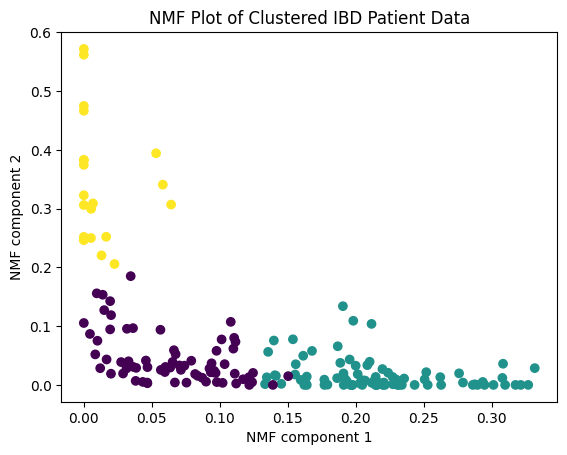

In [20]:
plt.scatter(nmf_results[:,0], nmf_results[:,1], c=labels)
plt.title("NMF Plot of Clustered IBD Patient Data")
plt.xlabel("NMF component 1")
plt.ylabel("NMF component 2")
plt.show()

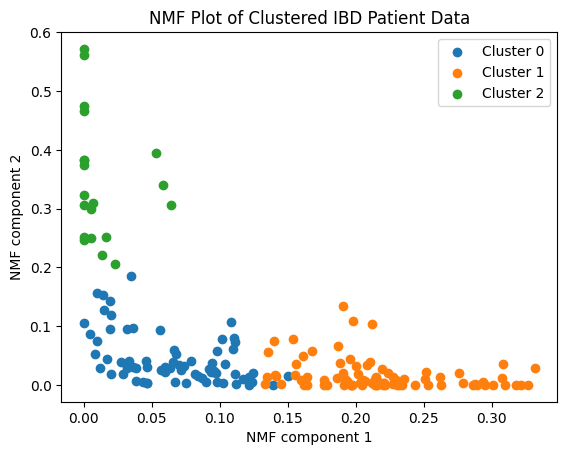

In [21]:
cluster_labels = labels

unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    plt.scatter(nmf_results[cluster_labels == label, 0], 
                nmf_results[cluster_labels == label, 1], 
                label='Cluster {}'.format(label))

plt.legend()
plt.title("NMF Plot of Clustered IBD Patient Data")
plt.xlabel("NMF component 1")
plt.ylabel("NMF component 2")
plt.show()

In [22]:
corr_matrix_nmf = np.corrcoef(df.T, nmf_results.T)
print(len(corr_matrix_nmf))
importance_scores_nmf = np.abs(corr_matrix_nmf[:-2, -2:])
print(len(importance_scores_nmf))

feature_importance_nmf = pd.DataFrame(importance_scores_nmf.T, columns=feature_names)
feature_ranking_nmf = feature_importance_nmf.mean().sort_values(ascending=False)
print(feature_ranking_nmf[0:5])

478
476
Bacteria; __Bacteroidetes; __Bacteroidia; __Bacteroidales; __Bacteroidaceae; __Bacteroides                              0.748865
Bacteria; __Proteobacteria; __Gammaproteobacteria; __Enterobacteriales; __Enterobacteriaceae; __Escherichia_Shigella    0.744362
Bacteria; __Deinococcus_Thermus; __Deinococci; __Thermales; __Thermaceae; __Thermus                                     0.221350
Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Epulopiscium                                0.217235
Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Clostridiaceae_1; __Clostridium_sensu_stricto_2                0.209800
dtype: float64


/home/cpryor7/miniconda3/envs/cenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/cpryor7/miniconda3/envs/cenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# top 5 from k-mean cluster important features are Escherichia Shigella, Bacteroides, Eubacterium rectale group, Ruminococcus gnavus group, and Akkermansia

# same ones - Bacteroides, E. shigella
# diff ones - Thermus, Epulopiscium, Clostridium sensu stricto 2

In [52]:
# can then look at the distribution of these important features across the different clusters
# if the plot wasn't already made for common features

df['cluster'] = labels
cluster_groups = df.groupby('cluster')

Text(0.5, 1.0, 'Distribution of Tyzzerella by Cluster')

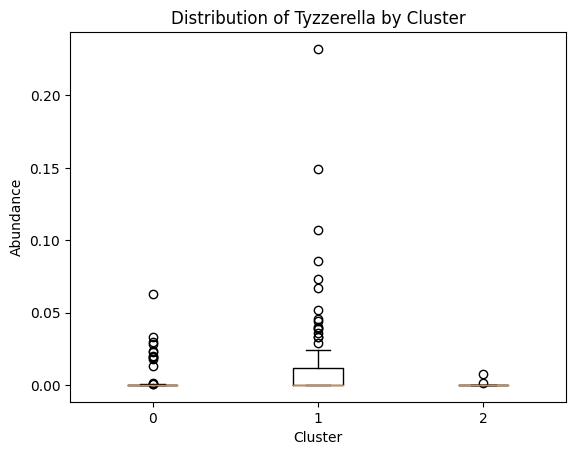

In [60]:
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Tyzzerella'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Tyzzerella by Cluster')

Text(0.5, 1.0, 'Distribution of Thermus by Cluster')

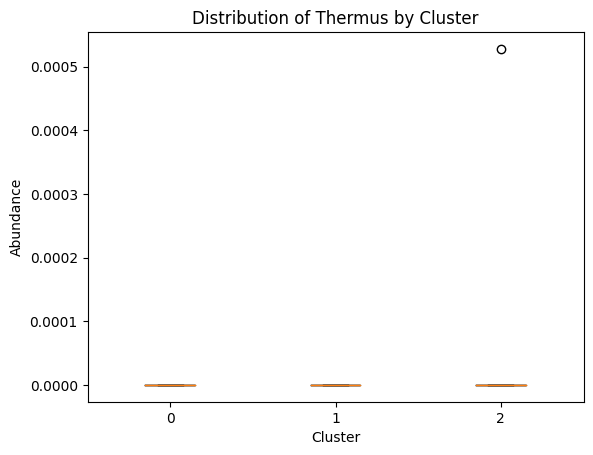

In [61]:
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Deinococcus_Thermus; __Deinococci; __Thermales; __Thermaceae; __Thermus'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Thermus by Cluster')

Text(0.5, 1.0, 'Distribution of Roseburia by Cluster')

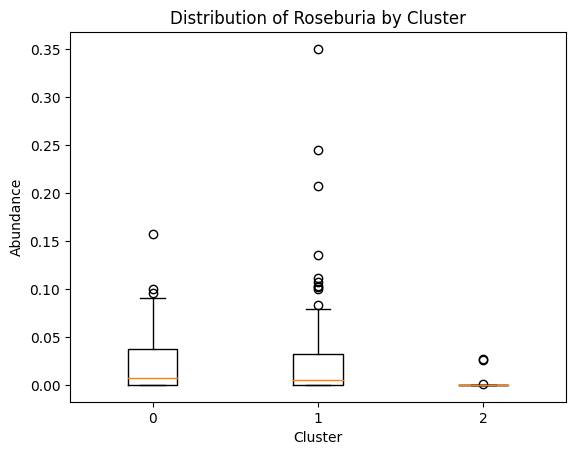

In [66]:
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Roseburia'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Roseburia by Cluster')

Text(0.5, 1.0, 'Distribution of Epulopiscium by Cluster')

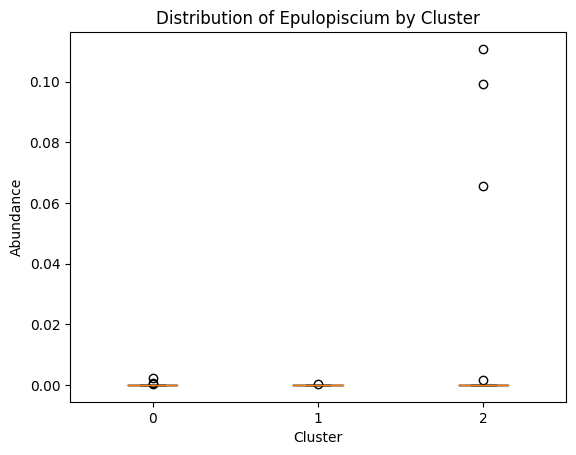

In [62]:
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Epulopiscium'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Epulopiscium by Cluster')

Text(0.5, 1.0, 'Distribution of Clostridium_sensu_stricto_2 by Cluster')

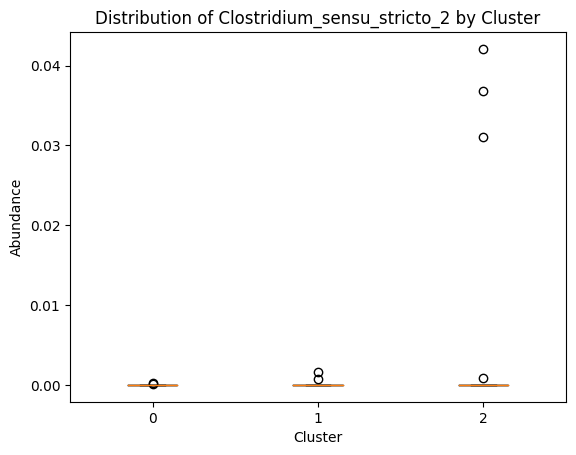

In [63]:
feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Clostridiaceae_1; __Clostridium_sensu_stricto_2'].values for cluster_label in cluster_groups.groups]
fig, ax = plt.subplots()
ax.boxplot(feature_data)
ax.set_xticklabels(cluster_groups.groups.keys())
ax.set_ylabel('Abundance')
ax.set_xlabel('Cluster')
ax.set_title('Distribution of Clostridium_sensu_stricto_2 by Cluster')

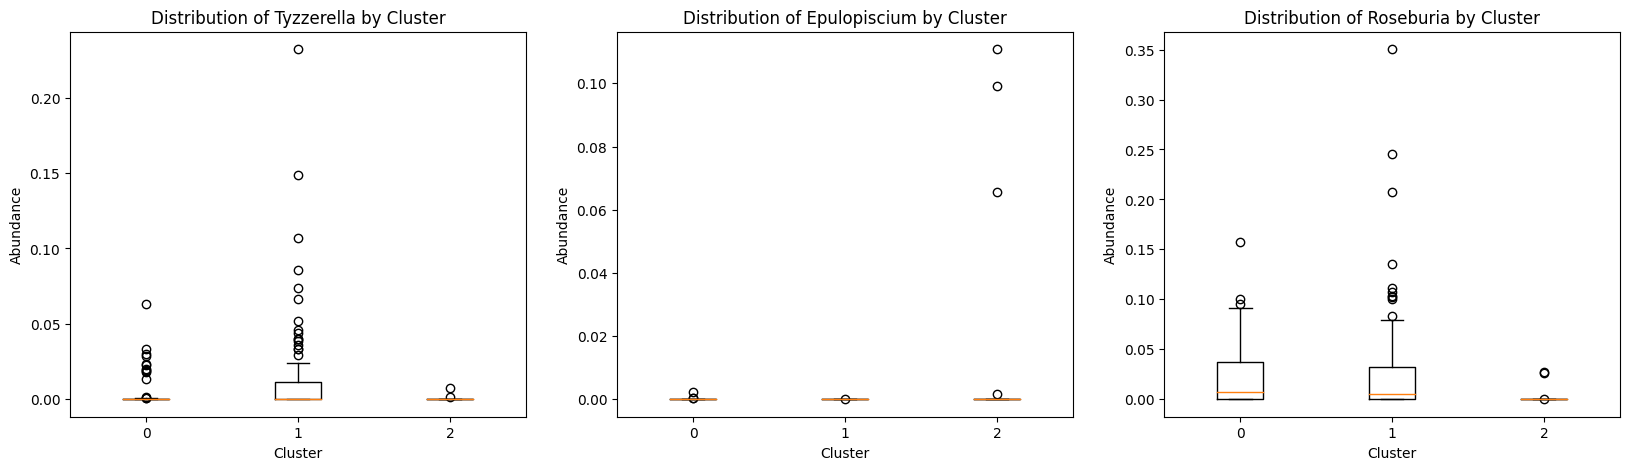

In [67]:
# combined figure of unique features for t-SNE

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Tyzzerella'].values for cluster_label in cluster_groups.groups]
ax[0].boxplot(feature_data)
ax[0].set_xticklabels(cluster_groups.groups.keys())
ax[0].set_ylabel('Abundance')
ax[0].set_xlabel('Cluster')
ax[0].set_title('Distribution of Tyzzerella by Cluster')

feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Epulopiscium'].values for cluster_label in cluster_groups.groups]
ax[1].boxplot(feature_data)
ax[1].set_xticklabels(cluster_groups.groups.keys())
ax[1].set_ylabel('Abundance')
ax[1].set_xlabel('Cluster')
ax[1].set_title('Distribution of Epulopiscium by Cluster')

feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Roseburia'].values for cluster_label in cluster_groups.groups]
ax[2].boxplot(feature_data)
ax[2].set_xticklabels(cluster_groups.groups.keys())
ax[2].set_ylabel('Abundance')
ax[2].set_xlabel('Cluster')
ax[2].set_title('Distribution of Roseburia by Cluster')

plt.show()

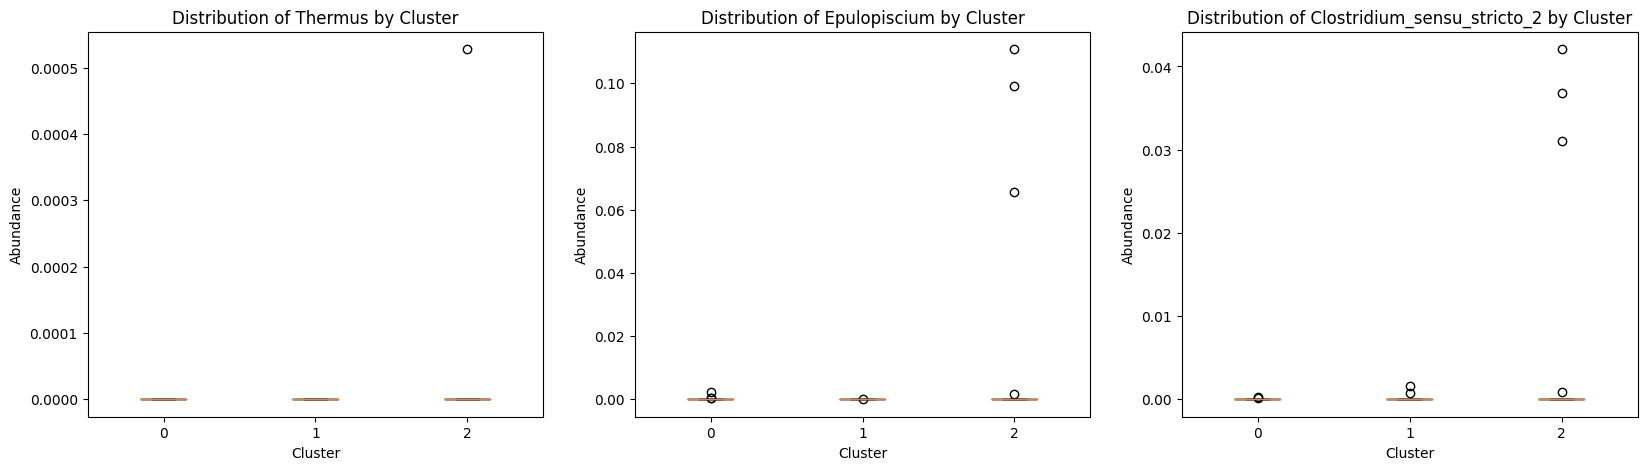

In [64]:
# combined figure of unique features for NMF

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Deinococcus_Thermus; __Deinococci; __Thermales; __Thermaceae; __Thermus'].values for cluster_label in cluster_groups.groups]
ax[0].boxplot(feature_data)
ax[0].set_xticklabels(cluster_groups.groups.keys())
ax[0].set_ylabel('Abundance')
ax[0].set_xlabel('Cluster')
ax[0].set_title('Distribution of Thermus by Cluster')

feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Lachnospiraceae; __Epulopiscium'].values for cluster_label in cluster_groups.groups]
ax[1].boxplot(feature_data)
ax[1].set_xticklabels(cluster_groups.groups.keys())
ax[1].set_ylabel('Abundance')
ax[1].set_xlabel('Cluster')
ax[1].set_title('Distribution of Epulopiscium by Cluster')

feature_data = [cluster_groups.get_group(cluster_label)['Bacteria; __Firmicutes; __Clostridia; __Clostridiales; __Clostridiaceae_1; __Clostridium_sensu_stricto_2'].values for cluster_label in cluster_groups.groups]
ax[2].boxplot(feature_data)
ax[2].set_xticklabels(cluster_groups.groups.keys())
ax[2].set_ylabel('Abundance')
ax[2].set_xlabel('Cluster')
ax[2].set_title('Distribution of Clostridium_sensu_stricto_2 by Cluster')

plt.show()